In [1]:
import xmitgcm
import glob
from xmitgcm import open_mdsdataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import xarray as xr
from xgcm import Grid
mpl.rcParams["font.size"] = 9
import matplotlib.transforms as mtransforms
from matplotlib.patches import Rectangle

In [2]:
def getoutput(data_dir,prefix):
    l=glob.glob(data_dir+prefix+'*')
    R=[i.split('.00', 1)[1] for i in l]
    S=[i.split('.', 1)[0] for i in R]
    T=[int(i) for i in S]
    T.sort()
    iters=T[-40:]
    deltaTClock = 21600.
    grid_dir = './K5000_plume/'
    data = open_mdsdataset(data_dir,grid_dir,iters=iters,delta_t=deltaTClock,prefix=prefix,geometry='sphericalpolar',default_dtype=np.dtype)
    return data

In [3]:
dyn20002=getoutput('./K2000_taux2/','dyn')
lat=dyn20002.YC
lon=dyn20002.XC

In [4]:
Zwind=np.fromfile('./K50grid/taux.bin',dtype='>f4')
Zwind=Zwind.reshape(128,64)
Zwind.shape

(128, 64)

In [5]:
Zwind2=np.fromfile('./K500_taux2/taux2.bin',dtype='>f4')
Zwind2=Zwind2.reshape(128,64)
Zwind2.shape

(128, 64)

In [6]:
sst=np.fromfile('./K5000_plume/sst_wide1.bin',dtype='>f4')
sst=sst.reshape(128,64)
sst.shape

(128, 64)

In [7]:
sflux=np.fromfile('./K5000/sflux2.bin',dtype='>f4')
sflux=sflux.reshape(128,64)
sflux.shape

(128, 64)

In [8]:
sflux2=np.fromfile('./K5000_plume/sflux_drake3.bin',dtype='>f4')
sflux2=sflux2.reshape(128,64)
sflux2.shape

(128, 64)

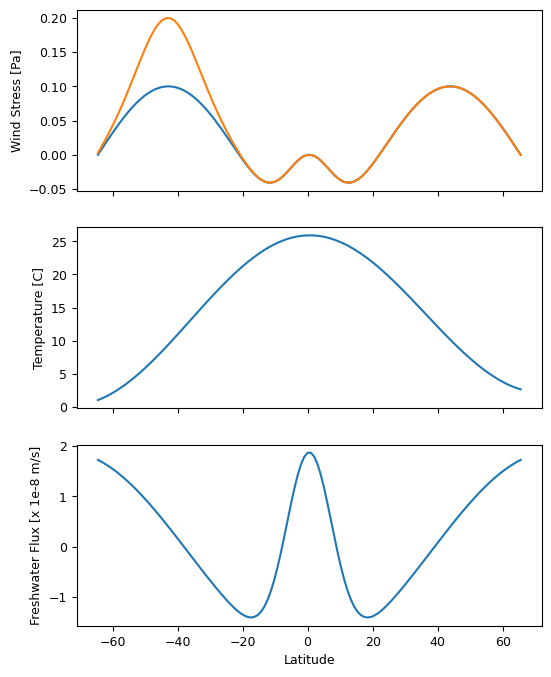

In [9]:
fig, axs = plt.subplots(nrows=3,figsize=(6,8),sharex=True)

axs[0].plot(lat,Zwind[:,0])
axs[0].plot(lat,Zwind2[:,0])
axs[0].set_ylabel('Wind Stress [Pa]')

axs[1].plot(lat,sst[:,0])
axs[1].set_ylabel('Temperature [C]')

axs[2].plot(lat,-1*sflux[:,0]/1e-8)
axs[2].set_ylabel('Freshwater Flux [x 1e-8 m/s]')
axs[2].set_xlabel('Latitude')

plt.savefig('model.png')

In [ ]:
#Surface Buoyancy plot

In [11]:
def buoyancy(dyn):
    buoy=(9.81*(2e-4*dyn['THETA'].mean('time')-7.4e-4*(dyn['SALT'].mean('time')-35)))
    return buoy

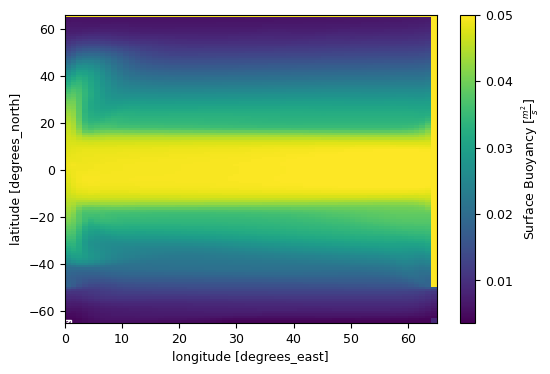

In [49]:
fig, axs = plt.subplots(figsize=(6,4))
rho20002=buoyancy(dyn20002)
C=rho20002[0].plot(ax=axs,vmax=.05,add_colorbar=False)
axs.add_patch(Rectangle((0, -65.), 1, 1, fill=False, hatch='///////', color='white'))
plt.colorbar(C,label='Surface Buoyancy ['r'$ \frac{m^2}{s} $'+']')
plt.title('')
plt.savefig('Surf_buoy.png')

In [ ]:
#Diffusion plot

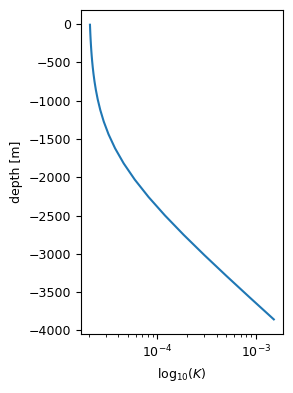

In [50]:
fig, ax = plt.subplots(figsize=(3,4))
z = np.fromfile('./K5000/RC.data',dtype='>f4')
zeta=500
diffusion = np.exp(-(4000+z)/zeta)/zeta/(1-np.exp(-4000/zeta))+2*10**-5
ax.semilogx(diffusion,z)
plt.ylabel('depth [m]')
plt.xlabel('log'r'$_{10}(K)$')
plt.tight_layout()
plt.savefig('diffusion.png')

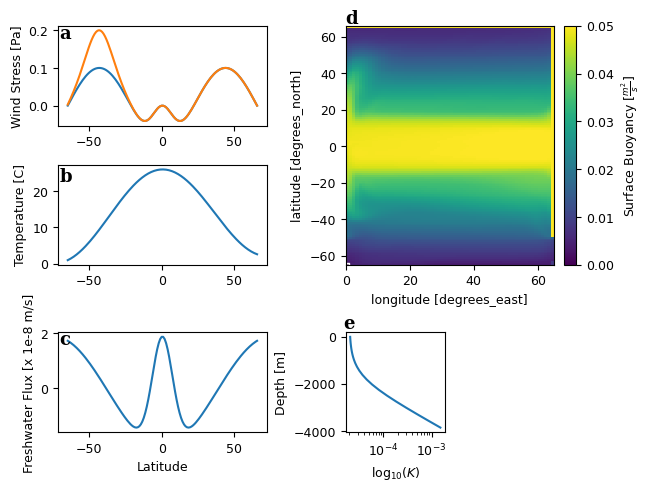

In [51]:
fig, axs = plt.subplot_mosaic([['a','a', 'd','d'], ['b','b', 'd','d'], ['c','c', 'e','.']],
                              layout='constrained')  
    
axs['a'].plot(lat,Zwind[:,0])
axs['a'].plot(lat,Zwind2[:,0])
axs['a'].set_ylabel('Wind Stress [Pa]')

axs['b'].plot(lat,sst[:,0])
axs['b'].set_ylabel('Temperature [C]')

axs['c'].plot(lat,-1*sflux[:,0]/1e-8)
axs['c'].set_ylabel('Freshwater Flux [x 1e-8 m/s]')
axs['c'].set_xlabel('Latitude')


rho20002=buoyancy(dyn20002)
rho20002[:,0,0:1]=0
C=rho20002[0].plot(ax=axs['d'],vmax=.05,add_colorbar=False)
plt.colorbar(C,label='Surface Buoyancy ['r'$ \frac{m^2}{s} $'+']')
axs['d'].add_patch(Rectangle((0, -65.), 1, 1, fill=False, hatch='///////', color='white'))
axs['d'].set_title('')



z = np.fromfile('./K5000/RC.data',dtype='>f4')
zeta=500
diffusion = np.exp(-(4000+z)/zeta)/zeta/(1-np.exp(-4000/zeta))+2*10**-5
axs['e'].semilogx(diffusion,z)
axs['e'].set_ylabel('Depth [m]')
axs['e'].set_xlabel('log'r'$_{10}(K)$')

axs['a'].text(-70.0, 0.215, 'a', fontsize='x-large', verticalalignment='top', fontfamily='serif', fontweight='bold')
axs['b'].text(-70.0, 26.5, 'b', fontsize='x-large', verticalalignment='top', fontfamily='serif', fontweight='bold')
axs['c'].text(-70.0, 2.1, 'c', fontsize='x-large', verticalalignment='top', fontfamily='serif', fontweight='bold')
axs['d'].text(0.0, 75, 'd', fontsize='x-large', verticalalignment='top', fontfamily='serif', fontweight='bold')
axs['e'].text(0.000015, 950, 'e', fontsize='x-large', verticalalignment='top', fontfamily='serif', fontweight='bold')

plt.savefig('model.png')